In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
Train_Data = pd.read_csv('fashion-mnist_train.csv')
Test_Data = pd.read_csv('fashion-mnist_test.csv')

display(Train_Data)
display(Test_Data)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


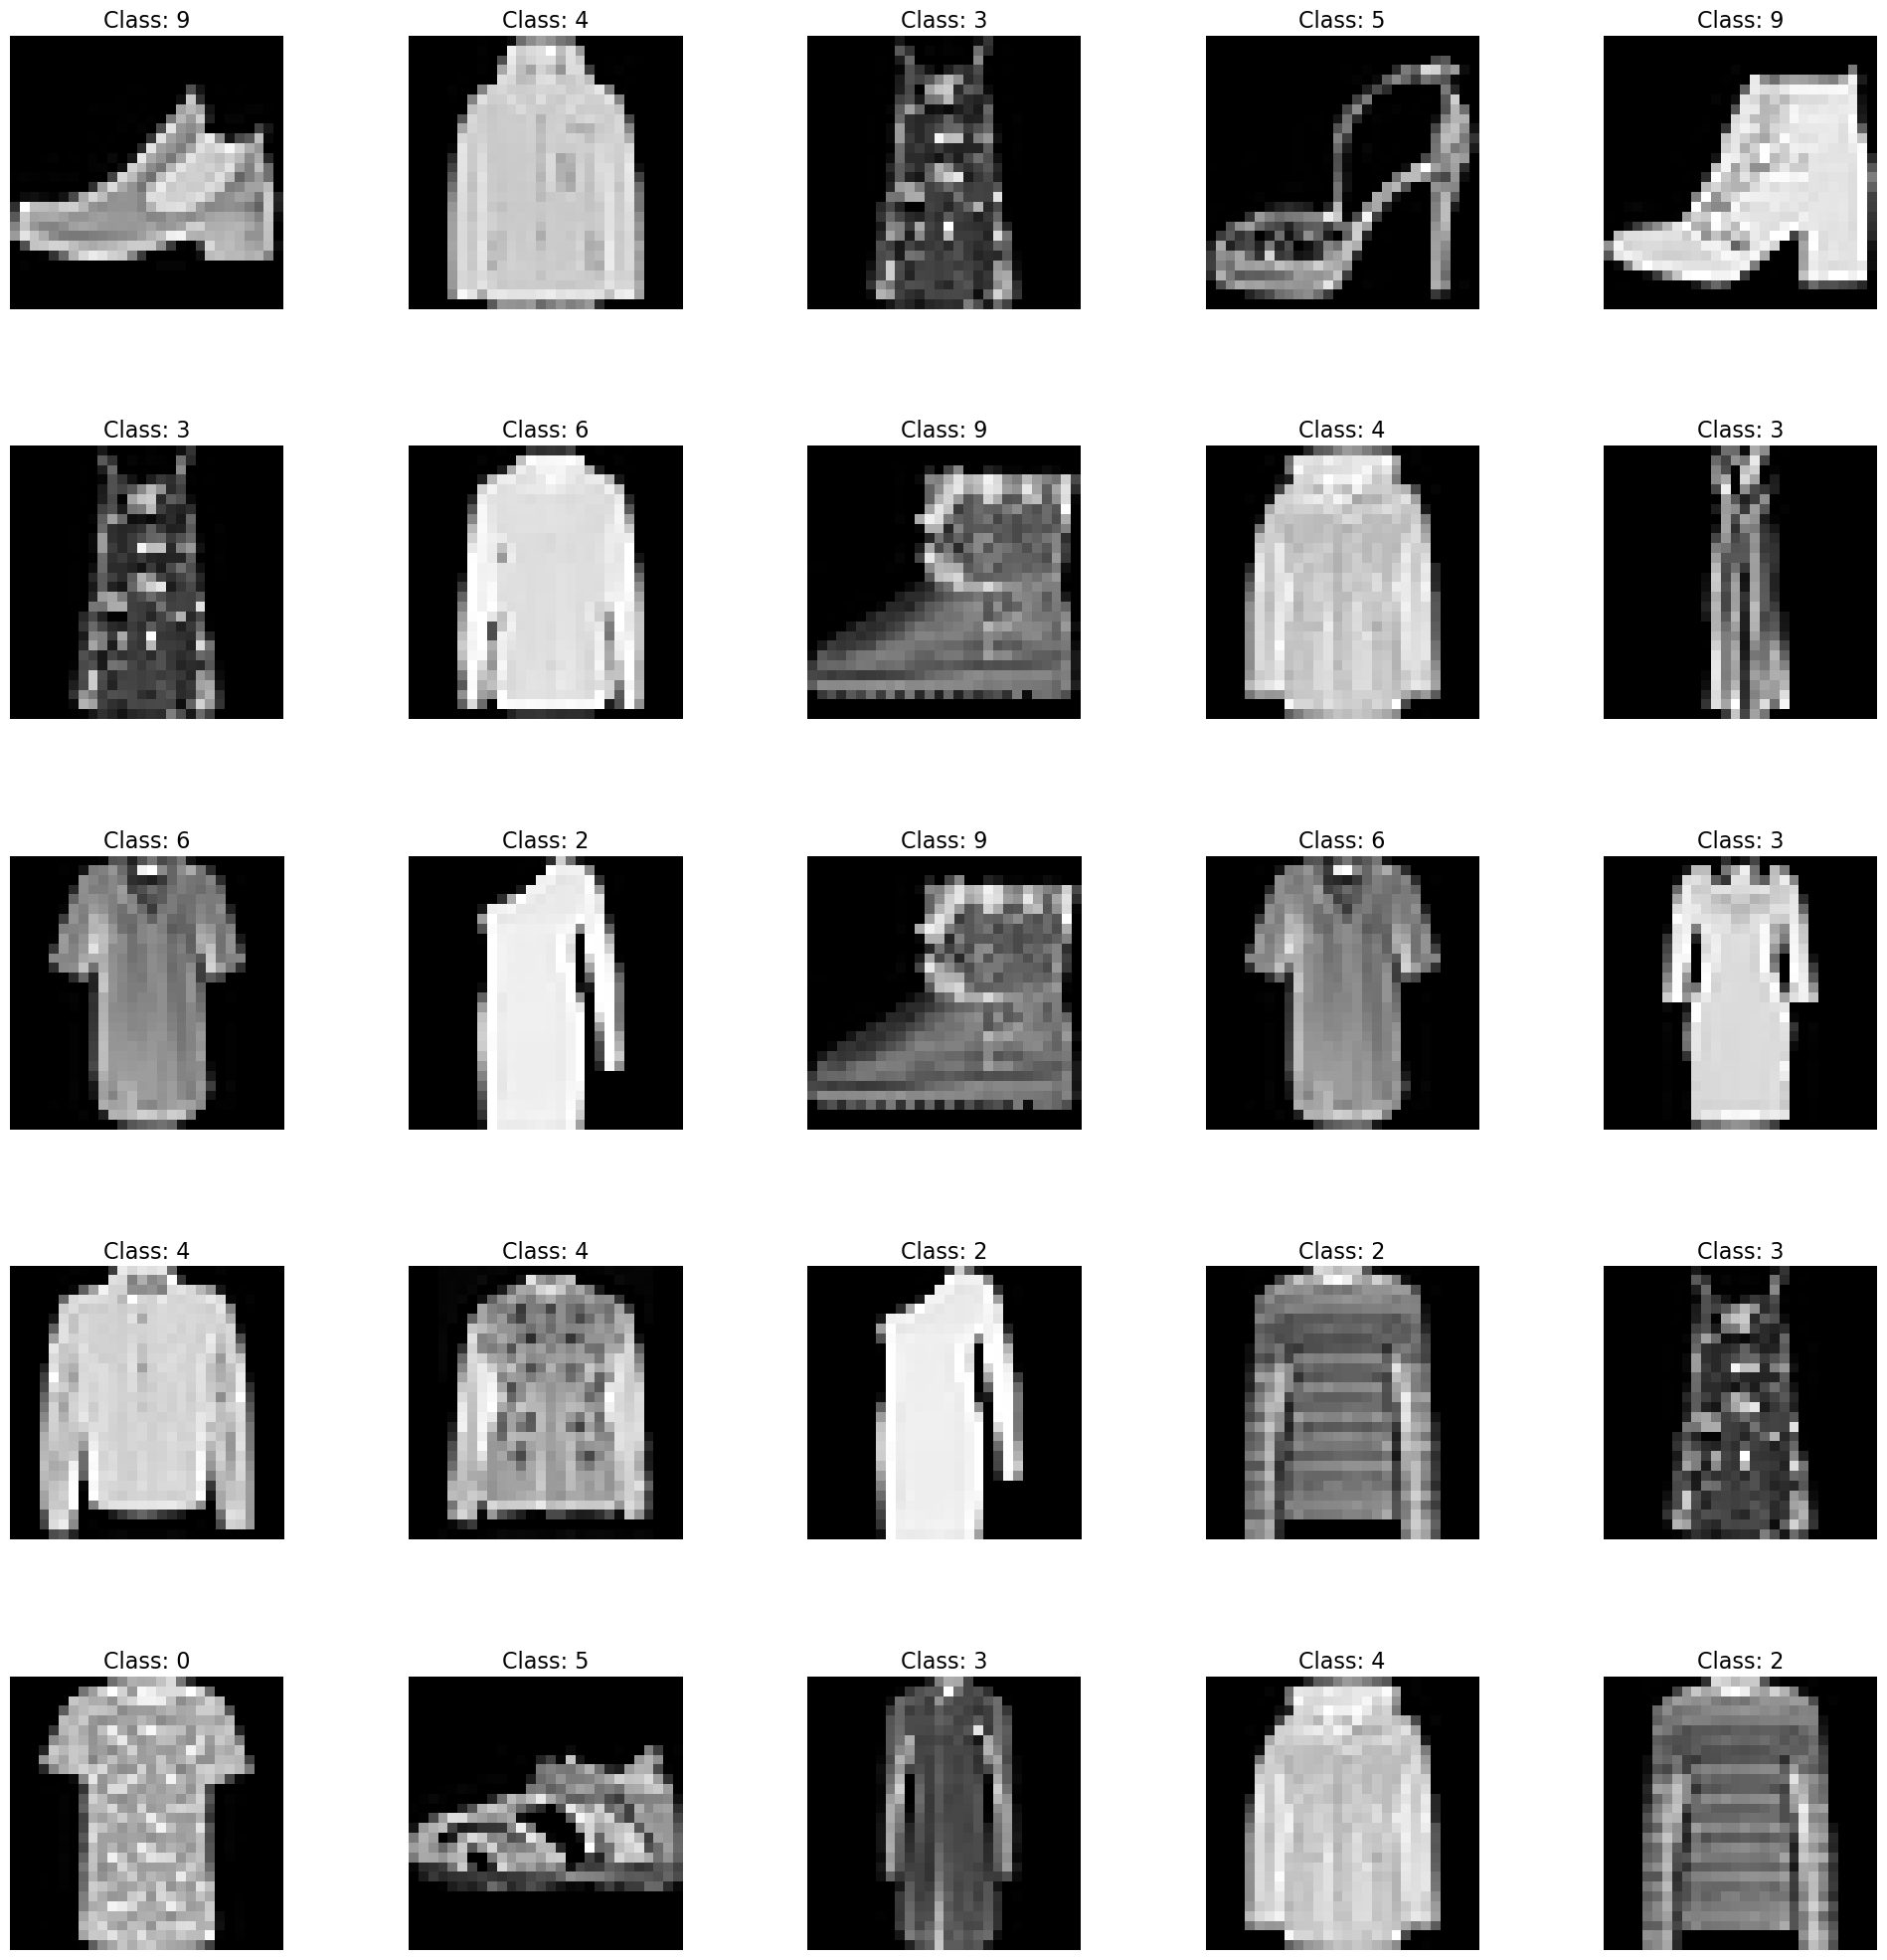

In [3]:
Train_image = Train_Data.values
Test_image = Test_Data.values

# Dimensions of the image grid.
grid_width = 25
grid_height = 25

fig, axes = plt.subplots(5, 5, figsize=(25, 25))
axes = axes.ravel()

for i in range(0,25):
    # Draft random index to get random image.
    index = np.random.randint(0, 60)
    axes[i].imshow(Train_image[index, 1:].reshape(28, 28), cmap='gray')
    # Show image class label above the drafted image.
    axes[i].set_title("Class: " + str(Train_image[index, 0]), fontsize=16)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)

In [4]:
X_train = Train_image[:, 1:] / 255

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
y_train = Train_image[:, 0]

X_test = Test_image[:, 1:] / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_test = Test_image[:, 0]

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
import tensorflow as tf
from tensorflow.keras import layers

# Layer 1

basic_cnn = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), strides = 2, activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
]) 

In [6]:
basic_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 dropout (Dropout)           (None, 6, 6, 64)          0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 576)               0

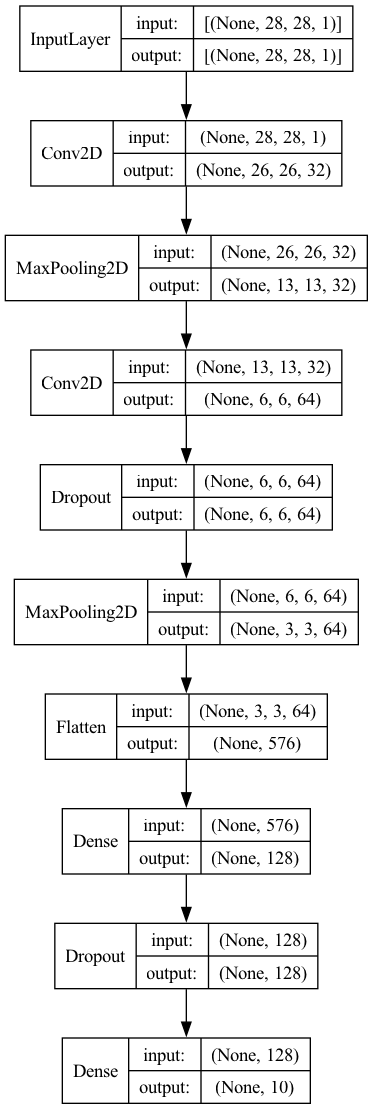

In [7]:
tf.keras.utils.plot_model(basic_cnn, to_file='model.png', show_shapes=True, show_layer_names=False)

In [8]:
early_stopping_callback = callbacks.EarlyStopping(patience=10)
batch_size = X_train.shape[0] // 20

basic_cnn.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

epochs_info = basic_cnn.fit(X_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=500,
                            callbacks=[early_stopping_callback],
                            validation_split=0.2)
     

Epoch 1/500
16/16 [==============================] - 5s 297ms/step - loss: 1.8541 - accuracy: 0.3535 - val_loss: 1.3860 - val_accuracy: 0.6177
Epoch 2/500
16/16 [==============================] - 4s 270ms/step - loss: 1.1124 - accuracy: 0.5846 - val_loss: 0.9789 - val_accuracy: 0.6892
Epoch 3/500
16/16 [==============================] - 4s 242ms/step - loss: 0.8652 - accuracy: 0.6813 - val_loss: 0.8255 - val_accuracy: 0.7310
Epoch 4/500
16/16 [==============================] - 4s 227ms/step - loss: 0.7413 - accuracy: 0.7245 - val_loss: 0.7184 - val_accuracy: 0.7609
Epoch 5/500
16/16 [==============================] - 4s 229ms/step - loss: 0.6742 - accuracy: 0.7491 - val_loss: 0.6613 - val_accuracy: 0.7817
Epoch 6/500
16/16 [==============================] - 5s 289ms/step - loss: 0.6298 - accuracy: 0.7667 - val_loss: 0.6278 - val_accuracy: 0.8040
Epoch 7/500
16/16 [==============================] - 6s 369ms/step - loss: 0.5958 - accuracy: 0.7778 - val_loss: 0.5919 - val_accuracy: 0.8191

Epoch 58/500
16/16 [==============================] - 4s 272ms/step - loss: 0.3218 - accuracy: 0.8835 - val_loss: 0.3078 - val_accuracy: 0.8982
Epoch 59/500
16/16 [==============================] - 5s 303ms/step - loss: 0.3191 - accuracy: 0.8830 - val_loss: 0.3100 - val_accuracy: 0.8963
Epoch 60/500
16/16 [==============================] - 5s 303ms/step - loss: 0.3194 - accuracy: 0.8848 - val_loss: 0.3041 - val_accuracy: 0.9016
Epoch 61/500
16/16 [==============================] - 5s 282ms/step - loss: 0.3184 - accuracy: 0.8834 - val_loss: 0.3020 - val_accuracy: 0.8995
Epoch 62/500
16/16 [==============================] - 5s 291ms/step - loss: 0.3213 - accuracy: 0.8839 - val_loss: 0.3018 - val_accuracy: 0.9021
Epoch 63/500
16/16 [==============================] - 5s 298ms/step - loss: 0.3178 - accuracy: 0.8844 - val_loss: 0.3020 - val_accuracy: 0.9031
Epoch 64/500
16/16 [==============================] - 5s 281ms/step - loss: 0.3150 - accuracy: 0.8859 - val_loss: 0.3044 - val_accuracy:

Epoch 115/500
16/16 [==============================] - 5s 320ms/step - loss: 0.2598 - accuracy: 0.9057 - val_loss: 0.2575 - val_accuracy: 0.9157
Epoch 116/500
16/16 [==============================] - 5s 290ms/step - loss: 0.2579 - accuracy: 0.9056 - val_loss: 0.2530 - val_accuracy: 0.9154
Epoch 117/500
16/16 [==============================] - 5s 309ms/step - loss: 0.2605 - accuracy: 0.9050 - val_loss: 0.2519 - val_accuracy: 0.9149
Epoch 118/500
16/16 [==============================] - 5s 285ms/step - loss: 0.2574 - accuracy: 0.9076 - val_loss: 0.2490 - val_accuracy: 0.9172
Epoch 119/500
16/16 [==============================] - 5s 294ms/step - loss: 0.2547 - accuracy: 0.9070 - val_loss: 0.2539 - val_accuracy: 0.9152
Epoch 120/500
16/16 [==============================] - 5s 289ms/step - loss: 0.2571 - accuracy: 0.9056 - val_loss: 0.2563 - val_accuracy: 0.9150
Epoch 121/500
16/16 [==============================] - 4s 268ms/step - loss: 0.2543 - accuracy: 0.9074 - val_loss: 0.2478 - val_ac

In [9]:
basic_cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2292 - accuracy: 0.9191


[0.22916333377361298, 0.9190999865531921]

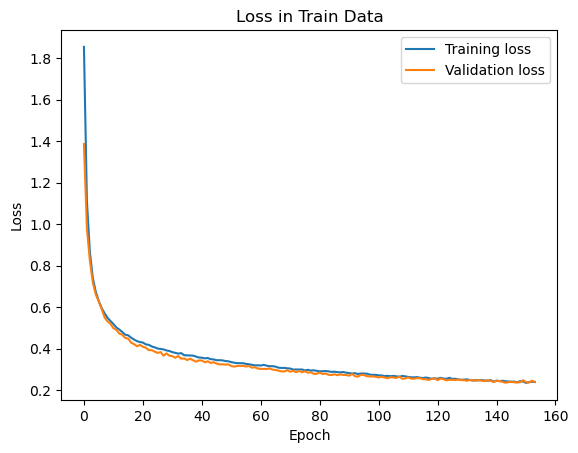

In [10]:
plt.plot(epochs_info.history['loss'])
plt.plot(epochs_info.history['val_loss'])
plt.title("Loss in Train Data")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

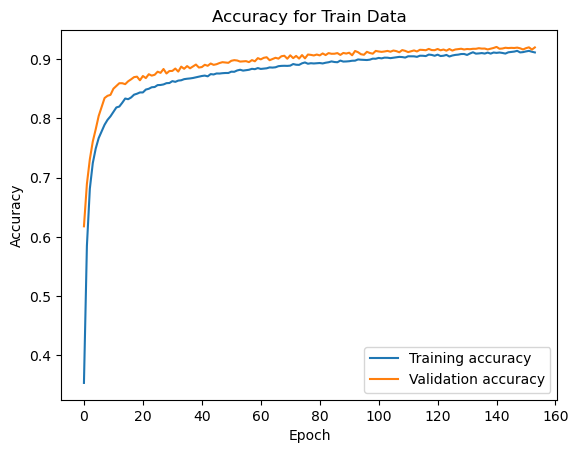

In [11]:
plt.plot(epochs_info.history['accuracy'])
plt.plot(epochs_info.history['val_accuracy'])
plt.title("Accuracy for Train Data")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Validation accuracy"])
plt.show()

In [12]:
#epochs_info = basic_cnn.fit(X_train,
                            #y_train,
                            #batch_size=batch_size,
                            #epochs=500,
                            #validation_split=0.15)

In [13]:
#plt.plot(epochs_info.history['loss'])
#plt.plot(epochs_info.history['val_loss'])
#plt.title("Loss in Train Data (Without Early Stopping)")
#plt.xlabel("Epoch")
#plt.ylabel("Loss")
#plt.legend(["Training loss", "Validation loss"])
#plt.show()

In [14]:
#plt.plot(epochs_info.history['accuracy'])
#plt.plot(epochs_info.history['val_accuracy'])
#plt.title("Accuracy for Train Data")
#plt.xlabel("Epoch")
#plt.ylabel("Accuracy")
#plt.legend(["Training accuracy", "Validation accuracy"])
#plt.show()

313/313 [==============================] - 0s 1ms/step


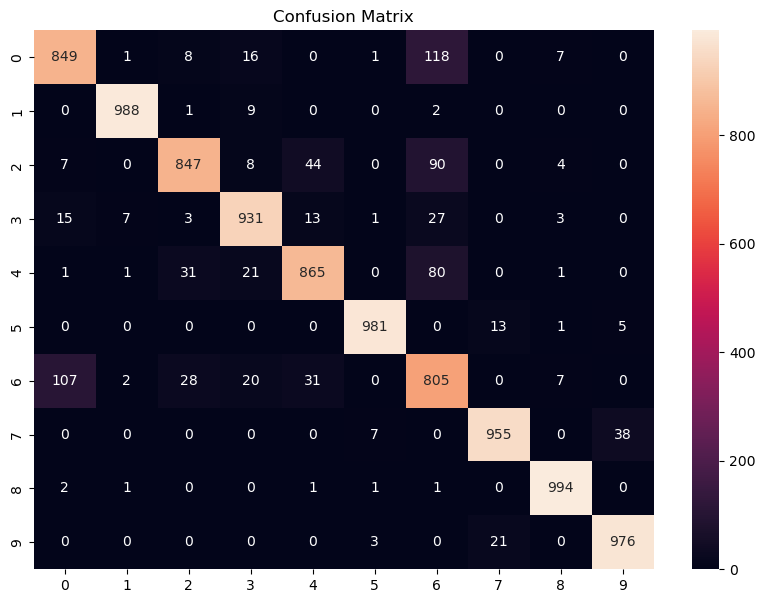

In [15]:
y_pred = basic_cnn.predict(X_test)

# Get the class with highest predicted probability and assume it is the
# model prediction.
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [16]:
class_names = ["0 -> T-shirt",
               "1 -> Trouser",
               "2 -> Pullover",
               "3 -> Dress",
               "4 -> Coat",
               "5 -> Sandal",
               "6 -> Shirt",
               "7 -> Sneaker",
               "8 -> Bag",
               "9 -> Ankle boot"]
print(classification_report(y_test, y_pred_classes, target_names=class_names))

                 precision    recall  f1-score   support

   0 -> T-shirt       0.87      0.85      0.86      1000
   1 -> Trouser       0.99      0.99      0.99      1000
  2 -> Pullover       0.92      0.85      0.88      1000
     3 -> Dress       0.93      0.93      0.93      1000
      4 -> Coat       0.91      0.86      0.89      1000
    5 -> Sandal       0.99      0.98      0.98      1000
     6 -> Shirt       0.72      0.81      0.76      1000
   7 -> Sneaker       0.97      0.95      0.96      1000
       8 -> Bag       0.98      0.99      0.99      1000
9 -> Ankle boot       0.96      0.98      0.97      1000

       accuracy                           0.92     10000
      macro avg       0.92      0.92      0.92     10000
   weighted avg       0.92      0.92      0.92     10000



In [17]:
# Adding more Layers


#basic_cnn = tf.keras.models.Sequential([
 #   layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  #  layers.MaxPooling2D((2, 2)),
   # layers.Conv2D(64, (3, 3), strides = 2, activation='relu'),
    #layers.Dropout(0.5),
 #   layers.MaxPooling2D((2, 2)),
  #  layers.Conv2D(64, (3, 3), strides = 2, activation='relu'),
 #   layers.Flatten(),
  #  layers.Dense(128, activation='relu'),
  #  layers.Dense(256, activation='relu'),
   # layers.Dropout(0.5),
   # layers.Dense(10, activation='softmax')
#]) 

In [18]:
#early_stopping_callback = callbacks.EarlyStopping(patience=10)
#batch_size = X_train.shape[0] // 20

#basic_cnn.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
 #             metrics='accuracy')

#CNN_2 = basic_cnn.fit(X_train,
 #                           y_train,
 #                           batch_size=batch_size,
 #                           epochs=500,
 #                           callbacks=[early_stopping_callback],
 #                           validation_split=0.2)

In [19]:
#plt.plot(CNN_2.history['loss'])
#plt.plot(CNN_2.history['val_loss'])
#plt.title("Loss in Train Data")
#plt.xlabel("Epoch")
#plt.ylabel("Loss")
#plt.legend(["Training loss", "Validation loss"])
#plt.show()

In [20]:
#basic_cnn.evaluate(X_test, y_test)

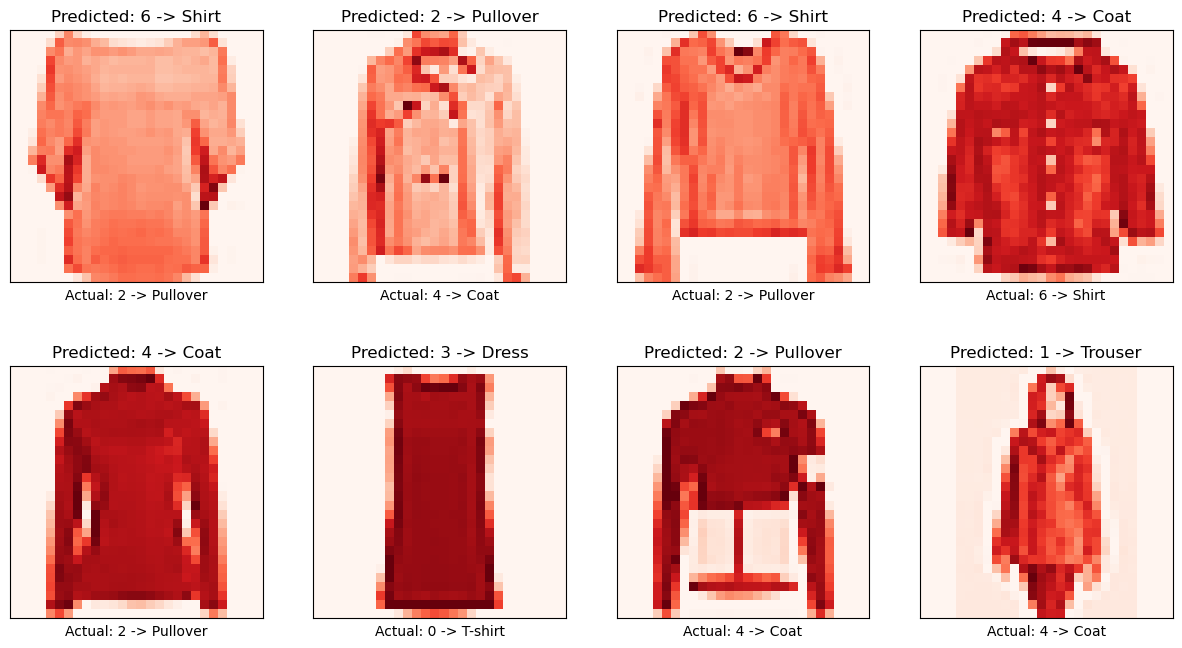

In [21]:
incorrect = np.nonzero(y_pred_classes!=y_test)[0]

# Display the first 16 incorrectly classified images from the test data set
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap="Reds")
    plt.title("Predicted: {}".format(class_names[y_pred_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[y_test[incorrect]]))